## Lectura XXXXXXXXXXXXXXXXX

Lectura de los archivos de reviews de XXXXXXXXXXXXXXXXXXX

In [68]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

Lectura de archivos json de las reviews efectuadas en el estado de XXXXXXXXXXXXXXXXXX. Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/7.json', lines= True)
df_8 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/8.json', lines= True)
df_9 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/9.json', lines= True)
df_10 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/10.json', lines= True)
df_11 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/11.json', lines= True)
df_12 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/12.json', lines= True)
df_13 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/13.json', lines= True)
df_14 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/14.json', lines= True)
df_15 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/15.json', lines= True)
df_16 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/16.json', lines= True)
df_17 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/17.json', lines= True)
df_18 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/18.json', lines= True)
df_19 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Florida/19.json', lines= True)



C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [47]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 20):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_XXXXXXXXXXXXXXXXXX = pd.concat(dfs, ignore_index=True)

In [20]:
# Vista primeros registros

reviews_XXXXXXXXXXXXXXXXXX.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.014719e+20,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,"{'time': 1627042799532, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
1,1.154772e+20,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,"{'time': 1582464056733, 'text': 'Thank you for...",0x8893863ea87bd5dd:0x9383ebf973e74abb
2,1.018050e+20,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb


In [4]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_XXXXXXXXXXXXXXXXXX.shape

(2850000, 8)

In [5]:
# Miro el tipo de información

reviews_XXXXXXXXXXXXXXXXXX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850000 entries, 0 to 2849999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 174.0+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_XXXXXXXXXXXXXXXXXX.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_XXXXXXXXXXXXXXXXXX.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,2745810,96.34
resp,2394601,84.02
text,1079510,37.88
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_XXXXXXXXXXXXXXXXXX.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
reviews_XXXXXXXXXXXXXXXXXX.user_id.nunique()

903683

En el estado de XXXXXXXXXXXXX, tenemos YYYYYYYYYY usuarios que emitieron ZZZZZZZZZZZZZZZZ reseñas.

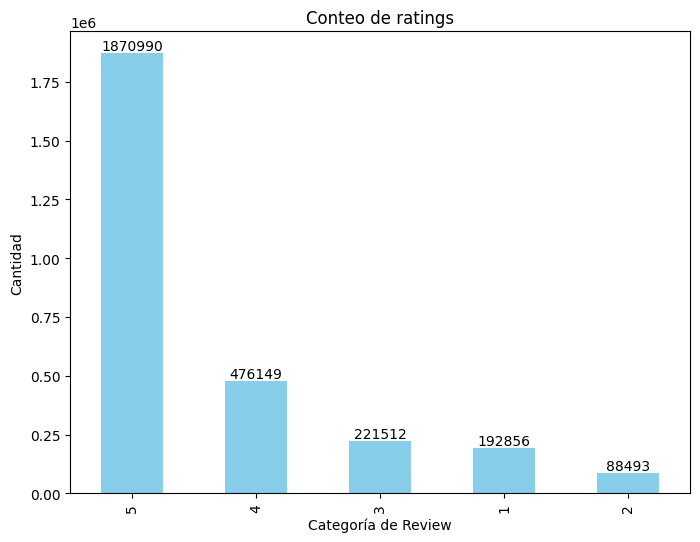

In [28]:
rating = reviews_XXXXXXXXXXXXXXXXXX.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [48]:
reviews_XXXXXXXXXXXXXXXXXX['time'] = pd.to_datetime(reviews_XXXXXXXXXXXXXXXXXX['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [53]:
reviews_XXXXXXXXXXXXXXXXXX['time'] = pd.to_datetime(reviews_XXXXXXXXXXXXXXXXXX['time'], format='%d/%m/%Y')

reviews_XXXXXXXXXXXXXXXXXX['year'] = reviews_XXXXXXXXXXXXXXXXXX['time'].dt.year

              user_id              name       time  rating  \
0        1.014719e+20   Julie A. Gerber 2021-08-03       1   
1        1.154772e+20  Martin Sheffield 2020-07-18       5   
2        1.018050e+20      Brian Truett 2018-04-05       5   
3        1.063444e+20          Tina Sun 2016-07-07       1   
4        1.008751e+20      James Haynes 2016-12-02       5   
...               ...               ...        ...     ...   
2849995  1.039909e+20    J. B. Oliveira 2017-08-21       5   
2849996  1.124797e+20            Adam K 2017-12-31       5   
2849997  1.103771e+20    English People 2018-07-10       5   
2849998  1.099194e+20           Shiva K 2018-07-26       4   
2849999  1.160935e+20  Tiago nascimento 2019-12-27       4   

                                                      text  pics  \
0        Update: Their “reply” to my review amounted to...  None   
1        He's a knowledgeable doctor but the way he run...  None   
2        Best doctor I've ever had, I never wait to

In [32]:
min_date = reviews_XXXXXXXXXXXXXXXXXX.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

01/01/2003
2003-01-01 00:00:00


In [33]:
max_date = reviews_XXXXXXXXXXXXXXXXXX.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

31/12/2020
2020-12-31 00:00:00


C:\Users\tomas\AppData\Local\Temp\ipykernel_3456\1085049245.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  maximun_date = pd.to_datetime(max_date)


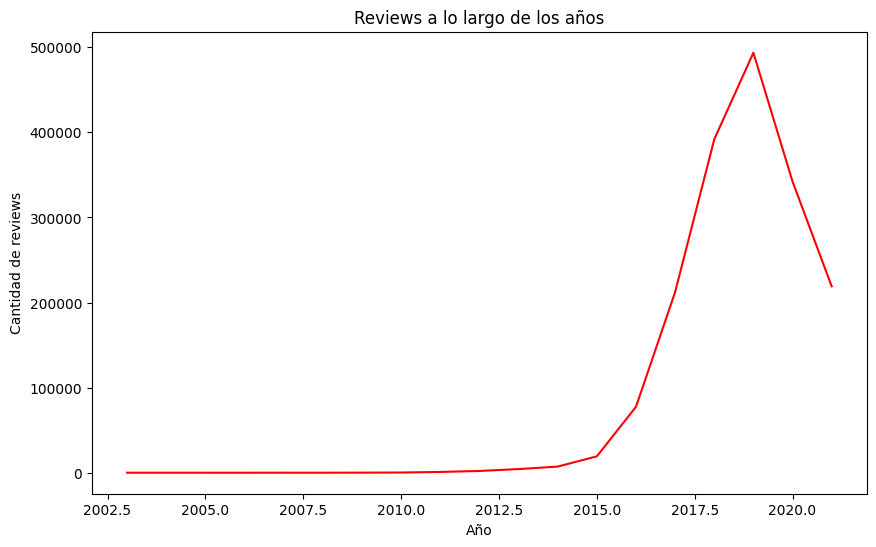

In [54]:
conteo_por_año= reviews_XXXXXXXXXXXXXXXXXX[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [70]:
reviews_XXXXXXXXXXXXXXXXXX["text"] = reviews_XXXXXXXXXXXXXXXXXX["text"].astype(str)

In [72]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_XXXXXXXXXXXXXXXXXX["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
#Realizo una nube de palabras de la columna title, donde puedo observar las palabras que aparecen con mas frecuencia 

# Combinar todos los valores de la columna en una sola cadena de texto
texto = " ".join(reviews_XXXXXXXXXXXXXXXXXX["text"])

# Tokenización y eliminación de stopwords
stop_words = set(stopwords.words("English"))
words = nltk.word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Unir las palabras en una cadena de texto
texto_procesado = " ".join(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\tomas/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\tomas\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
